In [104]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve

from numpy.random import shuffle

from sklearn.model_selection import train_test_split


def loader(fname):
    record = np.load(fname, allow_pickle=True)
    return record['X'], record['y']


def test(clf, fname='test.npz'):
    X_test, y_test = loader(fname) 
    y_predict = clf.predict(X_test)
    a = accuracy_score(y_test, y_predict)
    print(f'accuracy = {a:.2%}')


X, Y = loader('train.npz')

g = [i for i, x in enumerate(X)]
shuffle(g)
print(g)

X = X[g]
Y = Y[g]

g2 = shuffle([x for i, x in enumerate(X)])


def zNormalized(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data - mean) / std_dev


[312, 170, 167, 286, 317, 295, 178, 271, 391, 330, 188, 248, 180, 221, 366, 382, 370, 107, 255, 281, 365, 240, 251, 346, 341, 137, 372, 79, 93, 371, 394, 258, 266, 423, 3, 393, 152, 102, 310, 41, 161, 385, 73, 356, 212, 234, 275, 236, 51, 154, 327, 91, 374, 315, 140, 297, 24, 326, 77, 263, 352, 163, 125, 123, 159, 409, 308, 100, 321, 401, 145, 256, 162, 302, 10, 226, 238, 395, 149, 362, 124, 96, 9, 37, 151, 118, 168, 128, 119, 319, 222, 203, 197, 16, 65, 354, 205, 411, 105, 45, 34, 43, 241, 305, 349, 173, 402, 274, 359, 259, 300, 76, 116, 276, 331, 320, 307, 191, 289, 196, 224, 30, 282, 199, 54, 143, 345, 207, 233, 75, 146, 148, 294, 405, 218, 347, 397, 127, 86, 88, 68, 322, 358, 164, 130, 58, 414, 381, 215, 398, 306, 225, 63, 388, 202, 117, 81, 272, 348, 246, 53, 378, 113, 35, 61, 253, 380, 42, 28, 390, 337, 108, 257, 231, 387, 343, 245, 333, 6, 298, 150, 206, 420, 217, 268, 60, 82, 422, 299, 250, 5, 219, 303, 220, 340, 36, 261, 14, 55, 19, 384, 15, 175, 134, 4, 304, 31, 211, 309, 314

In [105]:
print(Y)

[1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]


In [106]:
from sklearn.metrics import mean_squared_error
X_normalized = zNormalized(X)

for _ in range(10):
    best_val = ""
    best_a = 0
    for i in range(2, 8, 1):
        X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=i*0.10)

        for y in range(4, 20, 1):
            clf = KNeighborsClassifier(n_neighbors=y, weights="distance").fit(X_train, y_train)

            y_predict = clf.predict(X_test)
            a = accuracy_score(y_test, y_predict)

            if a > best_a:
                best_val = f'test_size {i*0.10}, nn {y}, accuracy = {a:.2%}'
                best_a = a
    print(best_val)




test_size 0.2, nn 5, accuracy = 97.67%
test_size 0.2, nn 4, accuracy = 96.51%
test_size 0.5, nn 5, accuracy = 96.71%
test_size 0.7000000000000001, nn 6, accuracy = 94.98%
test_size 0.4, nn 4, accuracy = 97.08%
test_size 0.5, nn 7, accuracy = 97.18%
test_size 0.4, nn 6, accuracy = 97.08%
test_size 0.2, nn 5, accuracy = 96.51%
test_size 0.2, nn 5, accuracy = 98.84%
test_size 0.2, nn 6, accuracy = 97.67%


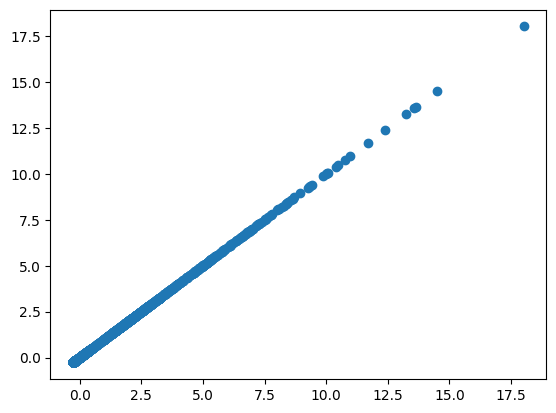

In [107]:
import matplotlib.pyplot as plt

plt.scatter(X_normalized, X_normalized)

In [110]:

X, Y = loader('test.npz')
           
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
g = [i for i, x in enumerate(X)]
shuffle(g)
print(g)

X = X[g]
Y = Y[g]

def zNormalized(data):
    mean = np.mean(data)
    
    std_dev = np.std(data)
    return (data - mean) / std_dev

X_normalized = zNormalized(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.3)
cls = KNeighborsClassifier(n_neighbors=8, weights="distance").fit(X_train, y_train)
y_predict = clf.predict(X_test)

print("accuracy", accuracy_score(y_test, y_predict))
print("precision_score", precision_score(y_test, y_predict))
print("recall_score", recall_score(y_test, y_predict))
print("confusion_matrix", confusion_matrix(y_test, y_predict))
print("f1_score", f1_score(y_test, y_predict))
test(cls)
a

[88, 3, 103, 39, 136, 52, 16, 130, 64, 110, 37, 81, 5, 109, 107, 36, 20, 115, 96, 0, 82, 121, 32, 61, 122, 141, 4, 86, 21, 97, 99, 44, 17, 94, 42, 104, 116, 2, 124, 68, 117, 90, 98, 106, 27, 23, 55, 131, 105, 74, 71, 50, 134, 12, 38, 29, 89, 48, 56, 139, 45, 75, 40, 92, 79, 31, 127, 91, 24, 73, 78, 19, 67, 13, 108, 57, 6, 135, 7, 54, 102, 33, 65, 47, 100, 22, 1, 128, 137, 133, 11, 72, 76, 138, 69, 49, 43, 70, 83, 77, 34, 123, 119, 125, 118, 142, 18, 140, 132, 30, 15, 66, 111, 58, 129, 25, 93, 9, 62, 114, 95, 126, 112, 63, 101, 53, 113, 26, 41, 8, 46, 84, 35, 28, 59, 14, 10, 51, 80, 120, 60, 87, 85]
accuracy 0.8604651162790697
precision_score 0.75
recall_score 0.9375
confusion_matrix [[22  5]
 [ 1 15]]
f1_score 0.8333333333333334
accuracy = 35.66%


0.9297658862876255

In [109]:
print(X_normalized)

[[-0.1890425201250102 -0.1744006965287316 0.29846048266156033 ...
  -0.27572769365253985 -0.27512389273661714 -0.27613515468633343]
 [-0.21293425767576316 -0.20061653306302088 0.13140424772497242 ...
  -0.27611702671426186 -0.2752173215157553 -0.2761598830995182]
 [-0.21990655462637201 -0.21107497848893414 0.08255168709103976 ...
  -0.27643552123896564 -0.2754557740714661 -0.2762409941540437]
 ...
 [-0.22520550030883474 -0.1982924340794846 0.05312859395947043 ...
  -0.2761761982743827 -0.2751280761147875 -0.27615528138353085]
 [-0.20740290209494683 -0.1990361457542162 0.18197664160672192 ...
  -0.27557941613739023 -0.27485522689412034 -0.27602657278182263]
 [-0.1914131010882172 -0.18086169170296248 0.28498070855704993 ...
  -0.2758197279722879 -0.27509274981023774 -0.27615611805916496]]


In [113]:
# Dobieranie hiperparametrów

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load iris dataset (or any other dataset of your choice)
iris = load_iris()
X, y = iris.data, iris.target

# Define hyperparameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV with the KNN classifier and hyperparameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
GridSearchCV
# Perform grid search
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best mean cross-validated score
best_score = grid_search.best_score_
print("Best Mean Cross-Validated Score:", best_score)

Best Hyperparameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best Mean Cross-Validated Score: 0.9800000000000001


In [114]:
# cross_val_score to wynik pojedynczej komórki GridSearchCV. 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

# Load iris dataset (or any other dataset of your choice)
iris = load_iris()
X, y = iris.data, iris.target

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# Print scores for each fold
print("Cross-Validation Scores:", cv_scores)

# Compute and print mean score
mean_score = cv_scores.mean()
print("Mean Score:", mean_score)

Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Score: 0.9733333333333334
